In [198]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

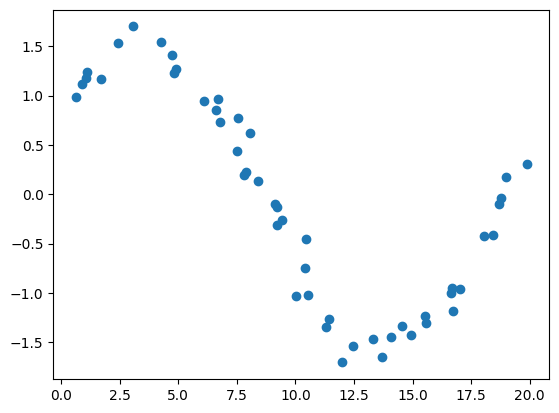

In [199]:
points = np.loadtxt('points.txt',float)
x = points[:,0]
y = points[:,1]

plt.scatter(x,y)
plt.show()

In [200]:
def f(x,a,b,c):
    return a*np.cos((np.pi*(x)/c)-b)

In [201]:
def find(x,y,y_tofind):
    for i in range(len(y)):
        if y[i] == y_tofind:
            return x[i]

Finding initial values for minuit

In [202]:
ymin = np.min(y)
ymax = np.max(y)
xmin = find(x,y,ymin)
xmax = find(x,y,ymax)
print(xmin,ymin)
print(xmax,ymax)

T = abs(xmax-xmin)
print("periodo ",T)

11.9877 -1.7051
3.086 1.70112
periodo  8.9017


In [203]:
yerr = 0.3*np.ones(len(y))
cst = LeastSquares(x,y,yerr,f)
fit = Minuit(cst,a=ymax,c=T,b=xmax)
fit.migrad()
fit.hesse()
a_fit,b_fit,c_fit = fit.values['a','b','c']
display(fit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.19 (χ²/ndof = 0.3)      │              Nfcn = 104              │
│ EDM = 1.61e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.56    │   0.07    │            │            │         │         │       │
│ 1 │ b    │   1.05    │   0.08    │            │            │         │         │       │
│ 2 │ c    │   10.35   │   0.23    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │ 0.00431   0.001  -0.003 │
│ b │   0.001 0.00705  -0.018 │
│ c │  -0.003  -0.018  0.0553 │
└───┴─────────────────────────┘

In [204]:
def residui(x,y,f,*args,**kwargs):
    residui = np.zeros(len(y))
    for i in range(len(y)):
        residui[i] = y[i] - f(x[i],*args,**kwargs)
    return residui

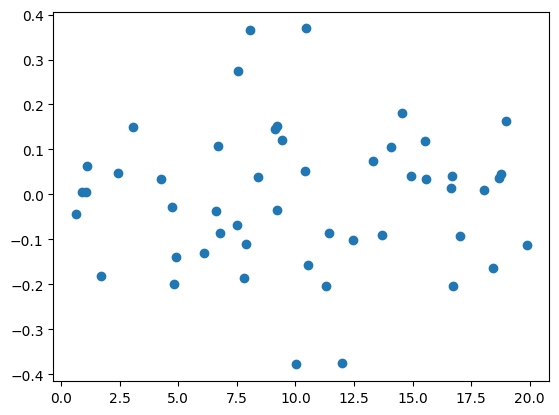

-0.008371207129234155
0.15387355613855092


In [205]:
res = residui(x,y,f,a_fit,b_fit,c_fit)
m,s = np.mean(res), np.std(res)

plt.scatter(x,res)
plt.show()
print(m,s,sep='\n')

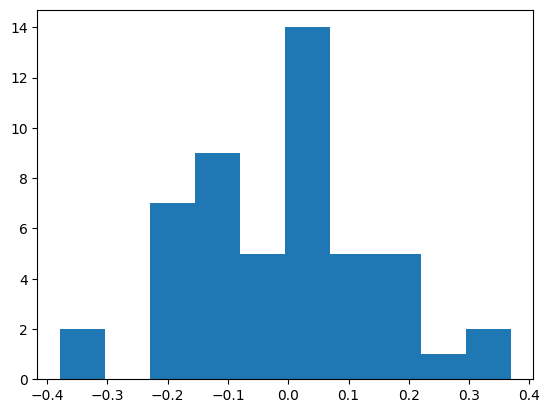

In [206]:
plt.hist(res)
plt.show()